In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_blobs

In [4]:
X,y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)

In [5]:
X.shape

(500, 2)

In [6]:
y.shape

(500,)

In [7]:
#X

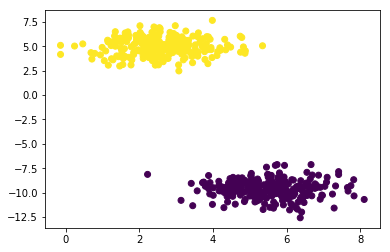

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [10]:
sigmoid(5)

0.9933071490757153

In [11]:
z=np.array([1,2,3,4,5])#broadcasting not available with lists#calculates the sigmoid of each number

In [12]:
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [13]:
def predict(X,w):#X=(m*n*1)W=(n*1)
    #print(X)#500,3
    z=np.dot(X,w)#3,1
    print(z.shape)#500
    prediction=sigmoid(z)
    return prediction



def loss(X,w,y):
    predictions=predict(X,w)
    print(predictions.shape)
    cost=np.mean(-y*np.log(predictions)-(1-y)*np.log(1-predictions))
    return cost
                 
                 
def update(X,w,y,lr):
    predictions=predict(X,w)
    
    dw=np.dot(X.T,predictions-y)#3,500 and 500,
    m=X.shape[0]
    w=w-lr*dw/(float(m))
    return w

                 
def train(X,y,lr=0.5,max_epochs=100):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    weights=np.zeros((X.shape[1]))
    for poch in range(max_epochs):
        weights=update(X,weights,y,lr)
        if poch %10==0:
            losss=loss(X,weights,y)
            print("epoch %d loss %.4f"%(poch,losss))
    return weights

In [14]:
weights=train(X,y)

(500,)
(500,)
(500,)
epoch 0 loss 0.0006
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 10 loss 0.0005
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 20 loss 0.0005
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 30 loss 0.0005
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 40 loss 0.0005
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 50 loss 0.0004
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 60 loss 0.0004
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 70 loss 0.0004
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 80 loss 0.0004
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
epoch 90 loss 0.0004
(500,)
(500,)


In [15]:
weights

array([ 0.02204952, -0.30768518,  1.90003958])

In [16]:
def getPredictions(x_test,w,labels=True):
    print(x_test.shape,w.shape)
    if x_test.shape[1]!=w.shape[0]:
        ones=np.ones((x_test.shape[0],1))
        x_test=np.hstack((ones,x_test))
    
    probs=predict(x_test,w)
    
    if labels!=True:
        return probs
    else :
        labels=np.zeros((probs.shape))
        labels[probs>0.5]=1
        return labels
    

In [17]:
x1=np.linspace(0,8,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

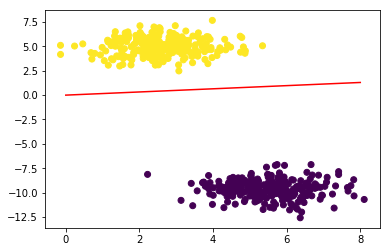

In [18]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x1,x2,c='red')
plt.show()

In [19]:
y_PRED=getPredictions(X,weights,labels=True)

(500, 2) (3,)
(500,)


In [20]:
print(y_PRED)

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.

In [21]:
accuracy=np.sum((y==y_PRED)/y.shape[0])
print(accuracy*100)

100.00000000000004
